<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Apellidos, Nombres** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [26]:
import miningscience as msc

help(msc.download_pubmed)
help(msc.mining_pubs)


Help on function download_pubmed in module miningscience:

download_pubmed(keyword)

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
import miningscience
import re
listst=miningscience.download_pubmed('Ecuador genomics')
p=re.findall(r'[DIMP]{4}\-.*\d\n',listst)
print ('El número de artículos es: ', len(p))
print ('El PMID del primero artículo es: ',p[0])


El número de artículos es:  193
El PMID del primero artículo es:  PMID- 35121084



## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [2]:
# Escriba aquí su código para el ejercicio 3

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


In [4]:
# Escriba aquí su código para el ejercicio 4

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=Data/listasfasta.fasta
Alignment with 10 rows and 342 columns
--------------------------------------------...--- 6A6J_DChain
-----------------GCAAACATCAATCACACCAAAAATCAT...--- U19688.1DRU19688
--------------------------------------------...--- 6A6J_BChain
--------------------------------------------...--- U19693.1DRU19693
ATATACAGAACAAACCATCATTACACAATAACGTACCTAATTGC...--- U19690.1DRU19690
--------------------------------------------...--- U19691.1DRU19691
---------AGCACCCTCTATTGTGAACGCNATGCAACTTCATT...--- U19689.1DRU19689
--------AATACAGCACTAAATAATAGTAAAAAACAAACAATA...GCT U19687.1DRU19687
--------------------------------------------...--- U19692.1DRU19692
------------------------------ACAAGCATTACTAA...--- U19686.1DRU19686
      , 6A6J_DChain
  ____|
 |    |__________________________________ U19688.1DRU19688
 |
 |              _______________ U19692.1DRU19692
 |       ______|
 |   ___|      |_______________________________________

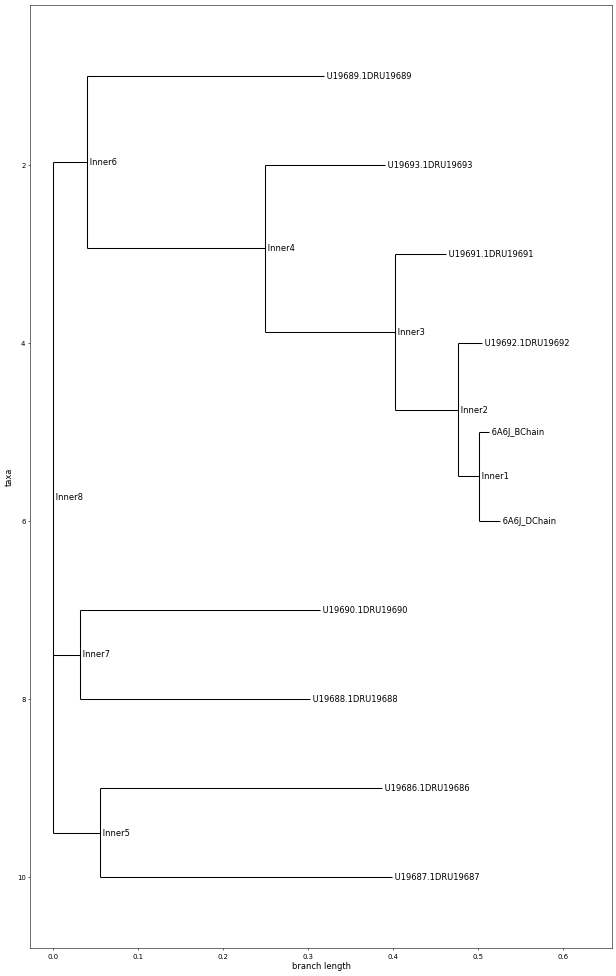

In [25]:
from IPython.core.display import Image
from Bio.Seq import Seq
from Bio.SeqUtils import GC

from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

# Filogenia
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

# Proteómica
from Bio.PDB import *
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData
import nglview as nv
import ipywidgets

import warnings
warnings.filterwarnings('ignore')
import Bio  
with open("data/sequence.seq","r") as archivo:
     listas = ["6A6J_D", "6A6J_B", "U19693.1", "U19692.1", "U19691.1", "U19690.1", "U19689.1", "U19688.1", "U19687.1", "U19686.1"]      
from Bio import Entrez
Entrez.email = "sebasgaibor@hotmail.com"
ofile = open("data/listasgb.gb", "w")
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= listas
                  ) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"):
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')
DatosFast=open('data/listasfasta.fasta','w')
with open("data/listasgb.gb",'r') as genbank: 
    a=genbank.read()
    for line in a:
        DatosFast.write(str(line))
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/listasfasta.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("data/listasfasta.aln", "clustal")
print(ClustalAlign)
# Generar Dendogram (Tree)
from Bio import Phylo
tree = Phylo.read("data/listasfasta.dnd", "newick")
Phylo.draw_ascii(tree)
# cargar alineamiento 
with open("data/listasfasta.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))
# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
# Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)
# Inicializar el constructor del arbol ( Tree Constructor )
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
arbolito= constructor.build_tree(alignment)
arbolito.rooted = True
print(arbolito)
# Guardar el arbol 
Phylo.write(arbolito, "data/arbolito.xml", "phyloxml")
arbolito = Phylo.read(file="data/arbolito.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt

# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(15, 25), dpi=50) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(arbolito, axes=axes)
fig.savefig("data/arbolitoclando")

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```